# Pymaceuticals Inc.
---

### Analysis

- Capomulin & Ramicane are the treatment regimens with the higher number of observations over the time, meaning they are enabling the patients to last longer. 
- Stelasyn, Caftamin, Infubinol and Propriva have a lower observation than the Placebo 
- Compulim treatment shows to be effective reducing the size of the tumors over the time. 
- And there is a strong correlation of the wight of the subjects vs. the size of tumors
 

In [446]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = study_results.merge(mouse_metadata, on='Mouse ID')
merge_df

# Display the data table for preview
merge_df_sorted = merge_df.sort_values('Timepoint', ascending=True)
merge_df_sorted.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [230]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [229]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df_sorted.duplicated(['Mouse ID','Timepoint']).astype(object)
duplicates.name = 'duplicated'
merge_df_duplicated = pd.concat([merge_df_sorted,duplicates], axis = 1)
filtro = merge_df_duplicated['duplicated']
filtered = merge_df_duplicated[filtro]
filtered['Mouse ID'].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [228]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df_sorted.set_index('Mouse ID').loc['g989'].reset_index()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,47.570392,0,Propriva,Female,21,26
3,g989,5,48.786801,0,Propriva,Female,21,26
4,g989,10,49.880528,0,Propriva,Female,21,26
5,g989,10,51.745156,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,54.657650,1,Propriva,Female,21,26
9,g989,20,55.326122,1,Propriva,Female,21,26


In [227]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# https://www.youtube.com/shorts/-NUKSuehyBA
merge_df_clean = merge_df_sorted.drop(merge_df_sorted[merge_df_sorted['Mouse ID']== 'g989'].index)
merge_df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [232]:
# Checking the number of mice in the clean DataFrame.
merge_df_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [352]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

merge_df_clean.groupby('Drug Regimen').agg(
    mean =('Tumor Volume (mm3)','mean'),
    median =('Tumor Volume (mm3)','median'), 
    var =('Tumor Volume (mm3)','var'),
    std =('Tumor Volume (mm3)','std'),
    sem =('Tumor Volume (mm3)','sem'),
)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

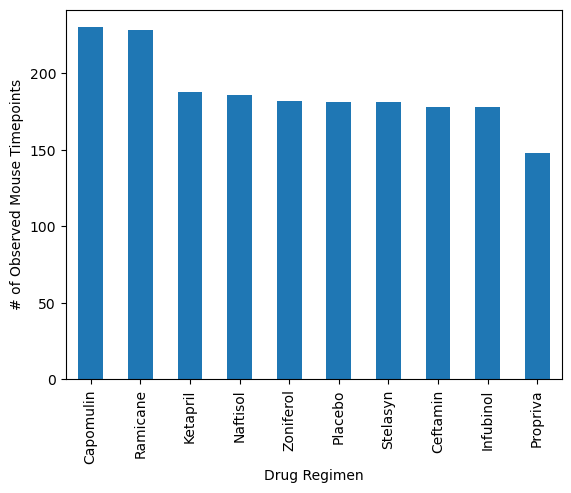

In [295]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
(
    merge_df_clean
    .groupby('Drug Regimen')['Timepoint']
    .count()
    .sort_values(ascending=False)
    .plot(kind='bar', xlabel= 'Drug Regimen', ylabel ='# of Observed Mouse Timepoints')
)
plt.show()

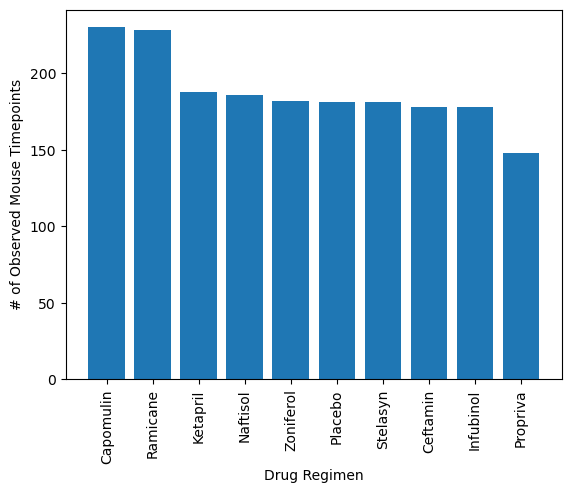

In [287]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
data_plot = merge_df_clean.groupby('Drug Regimen').agg(
    Time =('Timepoint','count'),
    MouseID =('Mouse ID','count')).reset_index()
data_plot_sorted = data_plot.sort_values('Time', ascending=False)

x_axis = data_plot_sorted['Drug Regimen']
y_values = data_plot_sorted['Time']

plt.bar(x_axis, y_values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')
plt.show()

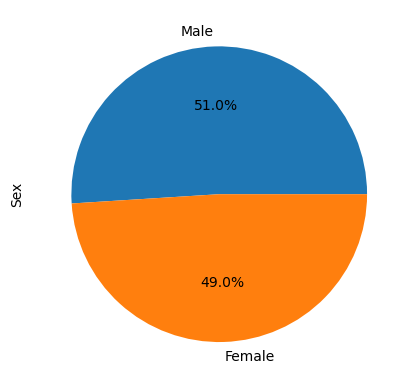

In [326]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexdf = pd.DataFrame(merge_df_clean)['Sex'].value_counts(normalize=True).mul(100).round(1)
sexdf.plot(kind='pie', autopct ='%1.1f%%')
plt.show()

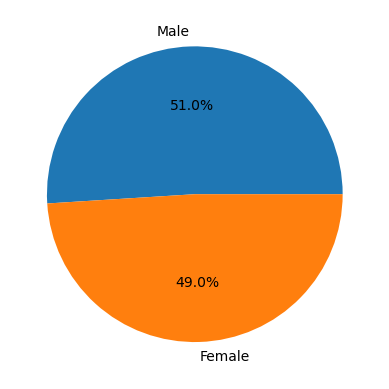

In [342]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexdf = pd.DataFrame(merge_df_clean)['Sex'].value_counts(normalize=True).mul(100).round(1)

values = sexdf
labels = ['Male','Female']

plt.pie(values,labels = labels, autopct ='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [387]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Latest_tumor_volume = merge_df_clean.groupby(['Mouse ID', 'Drug Regimen'])[['Timepoint', 'Tumor Volume (mm3)']].max()
Final_tumor_volume= Latest_tumor_volume.rename(columns={'Timepoint':'Final Timepoint','Tumor Volume (mm3)':'Final Tumor Vol'})
# Start by getting the last (greatest) timepoint for each mouse
merge_df_clean.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df_tumor = merge_df_clean.merge(Final_tumor_volume, on='Mouse ID')
merge_df_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint,Final Tumor Vol
0,b128,0,45.000000,0,Capomulin,Female,9,22,45,45.651331
1,b128,5,45.651331,0,Capomulin,Female,9,22,45,45.651331
2,b128,10,43.270852,0,Capomulin,Female,9,22,45,45.651331
3,b128,15,43.784893,0,Capomulin,Female,9,22,45,45.651331
4,b128,20,42.731552,0,Capomulin,Female,9,22,45,45.651331
...,...,...,...,...,...,...,...,...,...,...
1875,n304,40,59.830507,4,Naftisol,Male,9,26,45,63.586395
1876,n304,45,63.586395,4,Naftisol,Male,9,26,45,63.586395
1877,l264,0,45.000000,0,Ketapril,Female,15,30,10,50.659581
1878,l264,5,46.668766,0,Ketapril,Female,15,30,10,50.659581


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:xlabel='Drug Regimen', ylabel='Final Tumor Vol'>

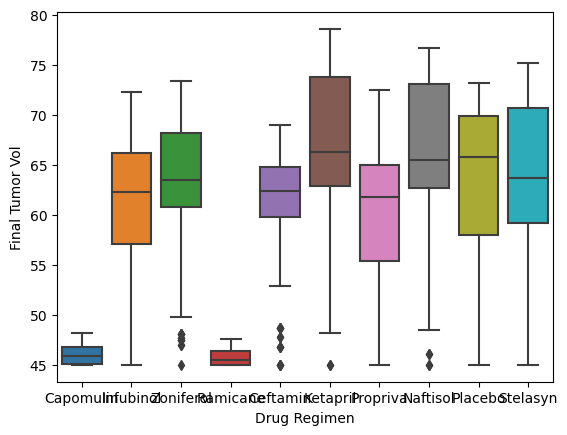

In [449]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group
# https://www.youtube.com/watch?v=RDbP9IUu1Q0
sns.boxplot(x='Drug Regimen',y='Final Tumor Vol', data=merge_df_tumor)

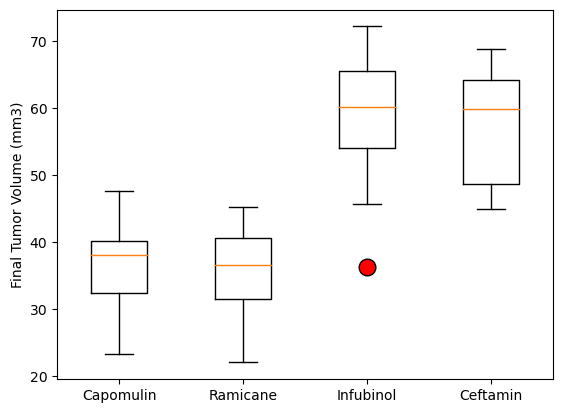

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

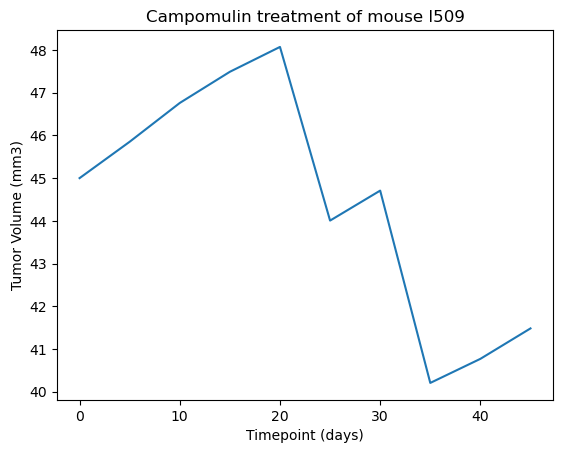

In [394]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_Treatment = merge_df_clean.set_index('Mouse ID').loc['l509'].reset_index()

x_axis = Capomulin_Treatment['Timepoint']
y_values = Capomulin_Treatment['Tumor Volume (mm3)']

plt.plot(x_axis, y_values)
plt.title('Campomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

In [398]:
Capomulin_Treatment2 = merge_df_clean.set_index('Drug Regimen').loc['Capomulin'].reset_index()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,b128,0,45.000000,0,Female,9,22
1,Capomulin,w914,0,45.000000,0,Male,24,21
2,Capomulin,v923,0,45.000000,0,Female,19,21
3,Capomulin,j119,0,45.000000,0,Female,7,23
4,Capomulin,u364,0,45.000000,0,Male,18,17
...,...,...,...,...,...,...,...,...
225,Capomulin,r944,45,41.581521,2,Male,12,25
226,Capomulin,u364,45,31.023923,3,Male,18,17
227,Capomulin,v923,45,40.658124,2,Female,19,21
228,Capomulin,j119,45,38.125164,1,Female,7,23


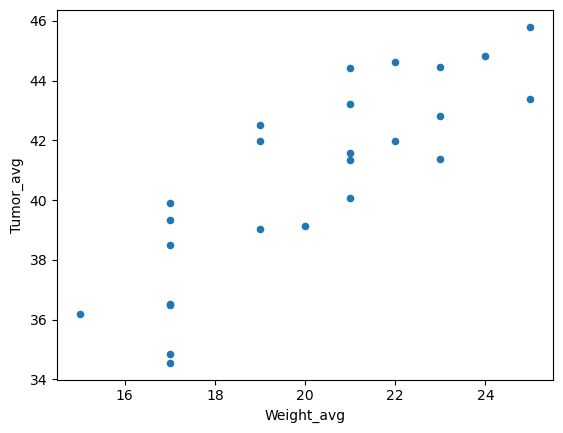

In [426]:
Capomulin_plot = Capomulin_Treatment2.groupby('Mouse ID').agg(
    Tumor_avg =('Tumor Volume (mm3)','mean'),
    Weight_avg =('Weight (g)','mean'),
).reset_index()

Capomulin_plot.plot(kind='scatter', x='Weight_avg', y='Tumor_avg')
plt.show()

## Correlation and Regression

In [436]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = Capomulin_plot['Weight_avg']
y_values = Capomulin_plot['Tumor_avg']

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

In [437]:
Capomulin_plot.corr()

,Tumor_avg,Weight_avg
Tumor_avg,1.000000,0.841936
Weight_avg,0.841936,1.000000


In [438]:
line_eq = f'y = {round(intercept,2)} + {round(slope,2)} x'
line_eq

'y = 21.55 + 0.95 x'

In [439]:
y_predict = intercept + (slope*x_values)

Text(5, 1, 'y = 21.55 + 0.95 x')

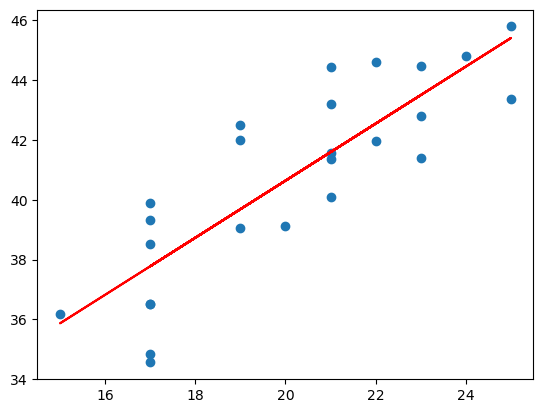

In [442]:
plt.scatter(x_values,y_values)
plt.plot(x_values, y_predict, color='r')
plt.annotate(line_eq,(5,1), color='r', fontsize =15)